In [2]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

- python glob을 이용해서 File Load

In [3]:
data_paths = glob('../dataset/mnist_png/training/0/*.png')
path = data_paths[0]
path

'../dataset/mnist_png/training/0\\1.png'

- tensorflow를 이용해서 File Load

In [4]:
# tensorflow load하기
data_paths = tf.io.matching_files('../dataset/mnist_png/training/*/*.png')
data_paths[0]

<tf.Tensor: id=5, shape=(), dtype=string, numpy=b'..\\dataset\\mnist_png\\training\\0\\1.png'>

## Load Image

In [6]:
gfile = tf.io.read_file(path)
# numpy로 변환하는 과정
image = tf.io.decode_image(gfile)
image.shape

TensorShape([28, 28, 1])

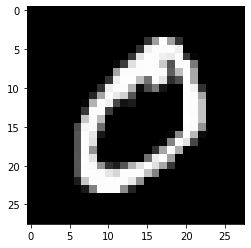

In [7]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

## Set Data Generator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- 정확도를 높이기 위해 이미지를 변환하여 다양하게 학습하기 위함.
- 고양이 서 있는 모습만 학습하면 누워있는 고양이는 판단하지 못한다.

In [11]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)

In [11]:
image.shape

TensorShape([28, 28, 1])

- CNN에 학습 데이터는 4차원이다.
- 따라서 3차원의 데이터(W, H, C)에 1차원에 batch size를 추가해 준다.

In [12]:
inputs = image[tf.newaxis, ...]
inputs.shape

TensorShape([1, 28, 28, 1])

- 데이터 확인

In [14]:
# for image in in datagen:
#     plt.imshow(image)
#     plt.show()
image = next(iter(datagen.flow(inputs)))
image.shape

(1, 28, 28, 1)

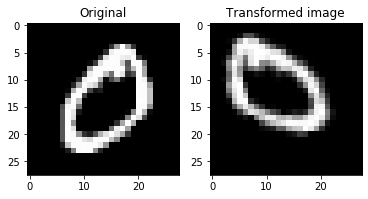

In [20]:
plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed image')
plt.imshow(np.squeeze(image), 'gray')

plt.show()

## Transformation
- width_shift_range
- height_shift_range
- brightness_range
- zoom_range
- horizontal_flip
- vertical_flip
- rescale
- preprocessing_function: 원하는 함수를 넣어주면 반영됨 ex)lamda, tf.image.resize

<function matplotlib.pyplot.show(*args, **kw)>

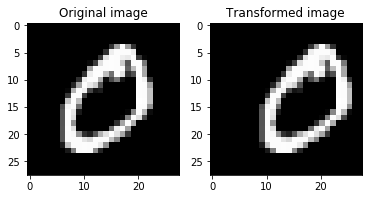

In [22]:
# 0.3 만큼 random하게 움직인다.
datagen = ImageDataGenerator(
    width_shift_range=0.3
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original image')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed image')
plt.imshow(np.squeeze(outputs), 'gray')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

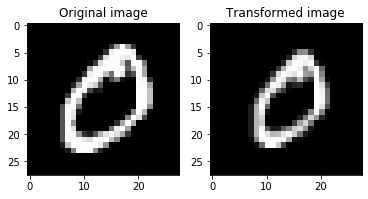

In [23]:
# 위아래, 좌우로 늘린다.
datagen = ImageDataGenerator(
    zoom_range=0.3
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original image')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed image')
plt.imshow(np.squeeze(outputs), 'gray')

plt.show

## Rescale시 주의사항
- traing에서만 변환만 하고 test는 하지 않해도 된다.
- 하지만 rescale은 train와 test 모두 적용해줘야한다.

In [24]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.7,
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)